<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Vector Representations
## *Data Science Unit 4 Sprint 2 Assignment 2*

In [0]:
import re
import string

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import spacy

## 1) *Clean:* Job Listings from indeed.com that contain the title "Data Scientist" 

You have `job_listings.csv` in the data folder for this module. The text data in the description column is still messy - full of html tags. Use the [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) library to clean up this column. You will need to read thru the documentation to accomplish this task. 

`Tip:` You will need to install the `bs4` library inside your conda environment. 

In [5]:
!ls

sample_data


In [8]:
from bs4 import BeautifulSoup
import requests

##### Your Code Here #####
df = pd.read_csv("https://github.com/ekoly/DS-Unit-4-Sprint-1-NLP/raw/master/module2-vector-representations/data/job_listings.csv")
df.head()

,Unnamed: 0,description,title
0,0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist
1,1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I
2,2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level
3,3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist
4,4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist


In [9]:
df["description"] = df["description"].apply(lambda s: " ".join(BeautifulSoup(s, "html.parser").stripped_strings).replace("\\n", " "))
df.head()

,Unnamed: 0,description,title
0,0,"b"" Job Requirements: Conceptual understanding...",Data scientist
1,1,"b' Job Description As a Data Scientist 1, ...",Data Scientist I
2,2,b' As a Data Scientist you will be working on ...,Data Scientist - Entry Level
3,3,"b' $4,969 - $6,756 a month Contract Under the ...",Data Scientist
4,4,b' Location: USA \xe2\x80\x93 multiple locatio...,Data Scientist


## 2) Use Spacy to tokenize the listings 

In [11]:
try:
    spacy.load("en_core_web_lg")
except:
    !python -m spacy download en_core_web_lg
    pass

     |████████████████████████████████| 826.9MB 1.2MB/s 
  Created wheel for en-core-web-lg: filename=en_core_web_lg-2.1.0-cp36-none-any.whl size=828255078 sha256=52482b82341c2ccd48044ed62f822dc061d5cb9098c391f165f93bacac4c7556
  Stored in directory: /tmp/pip-ephem-wheel-cache-5tbse55z/wheels/b4/d7/70/426d313a459f82ed5e06cc36a50e2bb2f0ec5cb31d8e0bdf09
Successfully built en-core-web-lg
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [0]:
from spacy.lang.en import English
from spacy.tokenizer import Tokenizer

nlp = English()
tokenizer = Tokenizer(nlp.vocab)

tokens = []
for doc in tokenizer.pipe(df["description"], batch_size=500):
    doc_tokens = [
        re.sub(r"[^a-z0-9]", "", t.lemma_.lower()).strip() for t in doc
        if not t.is_stop and not t.is_punct and t.text.strip()
    ]
    tokens.append(" ".join(doc_tokens))

df["tokens"] = tokens

## 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [0]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
counts = cv.fit_transform(df["tokens"])

<20x9026 sparse matrix of type '<class 'numpy.int64'>'
	with 3418 stored elements in Compressed Sparse Row format>

## 4) Visualize the most common word counts

In [22]:
from collections import Counter

counts = Counter()
for row in df["tokens"]:
    counts.update(row.split(" "))

print(counts.most_common(20))

[('datum', 3070), ('experience', 2002), ('work', 1577), ('team', 1271), ('business', 1225), ('data', 1208), ('science', 940), ('model', 883), ('product', 768), ('analysis', 768), ('learn', 732), ('analytics', 719), ('machine', 684), ('build', 684), ('scientist', 595), ('statistical', 562), ('help', 557), ('ability', 546), ('opportunity', 533), ('new', 529)]


In [24]:
!pip install squarify

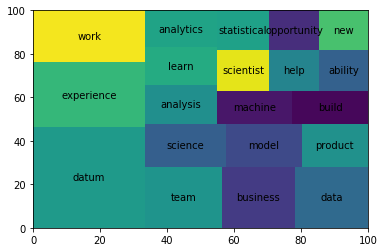

In [26]:
import squarify

mc = counts.most_common(20)
squarify.plot(sizes=[c for w, c in mc], label=[w for w, c in mc])

## 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()


In [29]:
X = vectorizer.fit_transform(df["tokens"])
X

<426x9026 sparse matrix of type '<class 'numpy.float64'>'
	with 91609 stored elements in Compressed Sparse Row format>

## 6) Create a NearestNeighbor Model. Write the description of your ideal datascience job and query your job listings. 

In [0]:
##### Your Code Here #####
raise Exception("\nThis task is not complete. \nReplace this line with your code for the task."

## Stretch Goals

 - Try different visualizations for words and frequencies - what story do you want to tell with the data?
 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high dimensional data.
 - Create a labeled dataset - which jobs will you apply for? Train a model to select the jobs you are most likely to apply for. :) 